In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import zomato reviews Dataset

In [2]:
import pandas as pd
df = pd.read_csv('dataset/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Column Description
* URL          : Link of resturant in zomzto website
* ADDRESS      : Address of Resturant
* name         : Resturant Name
* online_order : Weather Resturant has online ordering or not
* book_table   : Weather Resturant has table booking or not
* rate         : overall rating of the Resturant
* votes        : contains total numbers of ratings
* phone        : Mobile number of Resturant
* location     : contains city in wich the Resturant is located
* rest_type    : Resturant Type
* dish_liked   : Dishes most liked by the customers
* cuisines     : Type of food styles prepared
* approx_cost  : The approx cost for two people
* reviews_list : contains list of Reviews for the restaurant
* menu_item    : contains resturant food menu list 
* listed_in    : contains the neighborhood in which the restaurant is listed

In [6]:
# Data types of each column
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
# checking for NULL Values in the data table
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
# checking for duplicates in the table
df.duplicated().sum()

0

In [9]:
# removing un required columns
# creating new dataframe with deleted columns
# axis 0 indicates rows, axis 1 indicates column
df1=df.drop(['url','phone'],axis=1)

In [10]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
# checking again for duplicate values
df1.duplicated().sum() 

43

In [12]:
# deleting duplicate values
# inplace =True, represents make changes in the same table
df1.drop_duplicates(inplace=True)

In [13]:
df1.duplicated().sum() 

0

In [14]:
# Remove the nan values from data set
# how = 'any', function returns True if any item in an iterable are true
df1.dropna(how='any',inplace=True)
df1.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
# now we have dataset contains no null or duplicate values

In [16]:
# Rename the colunm names properly
df1 = df1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [17]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [18]:
df1.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [19]:
# convert the cost column into numerical category
df1.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [20]:
df1['cost'] = df1['cost'].apply(lambda x: x.replace(',',''))

In [21]:
df1['cost']=df1['cost'].astype(float)
df1['cost'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

In [22]:
df1['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [23]:
# Check the rating column and change it to numeric onec
df1.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
# remove new from rate column
df1=df1.loc[df1.rate!='NEW']
df1.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
# remove '/5' from the rate column
df1['rate'] = df1['rate'].apply(lambda x: x.replace('/5',''))

In [26]:
df1['rate']=df1['rate'].astype(float)

In [27]:
df1.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [28]:
df1.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [29]:
# Total number of unique Restaurants
df1.name.nunique()

3157

In [30]:
df1.shape

(23248, 15)

In [31]:
# Total number of Restaurants
df1.address.nunique()

4379

In [32]:
# Top 20 Restaurants with highest number of outlets in Bangalore
df1['name'].value_counts()[:20]

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Chung Wah                 45
Subway                    45
Lakeview Milkbar          44
eat.fit                   44
Hammered                  44
Name: name, dtype: int64

# visualiation graph

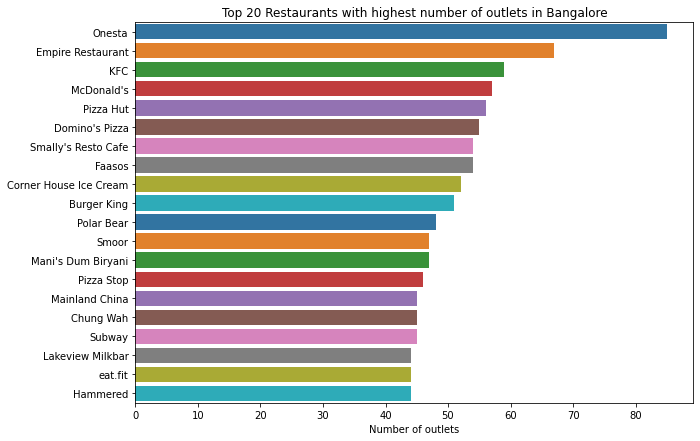

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
top20=df1['name'].value_counts()[:20]
sns.barplot(x=top20,y=top20.index,palette='tab10')
plt.title("Top 20 Restaurants with highest number of outlets in Bangalore")
plt.xlabel("Number of outlets")
plt.show()

In [34]:
# Restaurants with lowest number of outlets in Bangalore
df1['name'].value_counts()[-10:]

Hotel Janardhan                         1
Pizza Republic                          1
Kolkata Biriyani                        1
Royal Biriyani House                    1
Maa Reddy's Hyderabadi Biryani House    1
Insomniac's Delight                     1
Popular Burger                          1
Fresh 'N' Grills                        1
Lassi Resto Cafe                        1
Fujian Express                          1
Name: name, dtype: int64

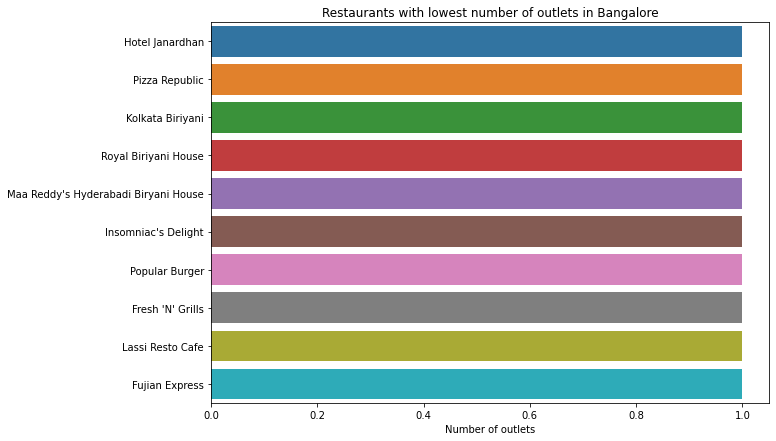

In [35]:
plt.figure(figsize=(10,7))
least10=df1['name'].value_counts()[-10:]
sns.barplot(x=least10,y=least10.index,palette='tab10')
plt.title("Restaurants with lowest number of outlets in Bangalore")
plt.xlabel("Number of outlets")
plt.show()

# Number of Restaurants offer Table booking option

In [36]:
# Restaurants that offer table bookings
df1['book_table'].value_counts()

No     17191
Yes     6057
Name: book_table, dtype: int64

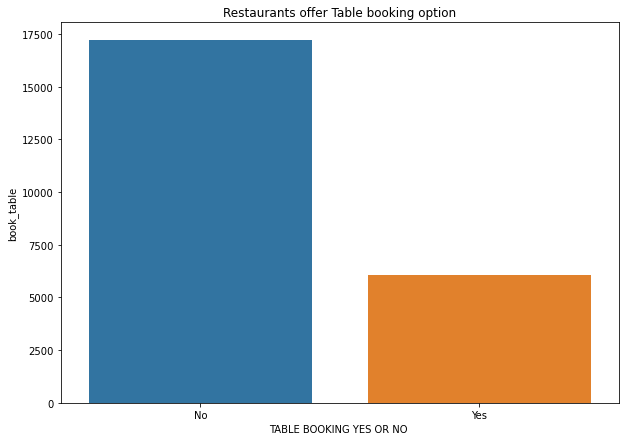

In [37]:
plt.figure(figsize=(10,7))
table_booking=df1['book_table'].value_counts()
sns.barplot(x=table_booking.index,y=table_booking,palette='tab10')
plt.title("Restaurants offer Table booking option")
plt.xlabel("TABLE BOOKING YES OR NO ")
plt.show()

* We can now see most of the restaurants donot offer table booking option

# How many Restaurants offer online booking facility

In [38]:
# Restaurants that offer online food bookings
df1['online_order'].value_counts()

Yes    16378
No      6870
Name: online_order, dtype: int64

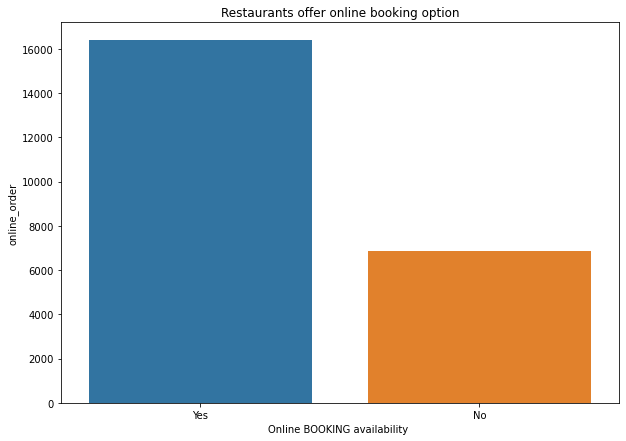

In [39]:
plt.figure(figsize=(10,7))
online_booking=df1['online_order'].value_counts()
sns.barplot(x=online_booking.index,y=online_booking,palette='tab10')
plt.title("Restaurants offer online booking option")
plt.xlabel("Online BOOKING availability ")
plt.show()

* we can observe that most of the Restaurants offer online delivering option 

# Restaurants Ratings 

In [40]:
ratings=df1['rate'].unique()
print('minimum',ratings.min())
print('maximum',ratings.max())
print('ratings -' ,sorted(ratings))

minimum 1.8
maximum 4.9
ratings - [1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]


In [41]:
# number of ratings that are lessthan 2 and greater than 1
((df1['rate']>=1) & (df1['rate']<2)).sum()

5

In [42]:
# number of ratings that are lessthan 5 and greater than 4
((df1['rate']>4) & (df1['rate']<5)).sum()

9009

In [43]:
# number of ratings that are between 3 and 4
((df1['rate']>=3) & (df1['rate']<=4)).sum()

13055

<AxesSubplot:xlabel='rate', ylabel='Density'>

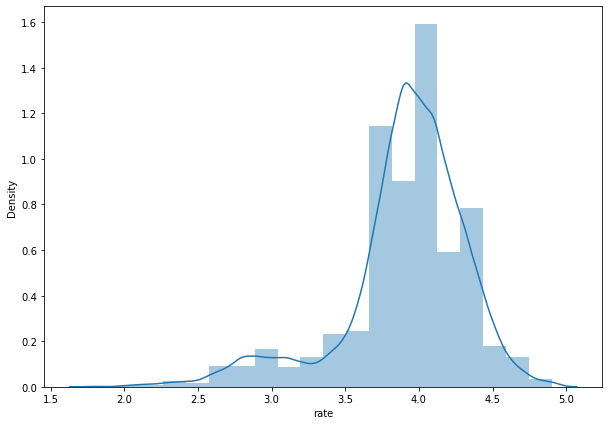

In [44]:
# distrubtion of rating
plt.figure(figsize=(10,7))

sns.distplot(df1['rate'],bins=20)

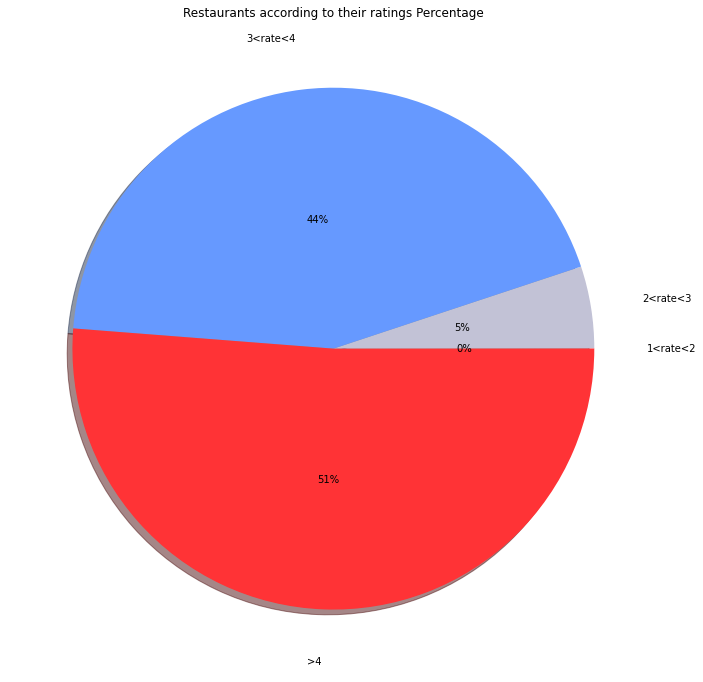

In [45]:
# pie chart for better understanding the ratings
slices=[((df1['rate']>=1) & (df1['rate']<2)).sum(),
        ((df1['rate']>=2) & (df1['rate']<3)).sum(),
        ((df1['rate']>=3) & (df1['rate']<4)).sum(),
        (df1['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3336','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Restaurants according to their ratings Percentage")

fig.set_size_inches(12,12)
plt.show()

* Restaurants with rating greaterthan 4 is 51%
* Restaurants with rating between 3 and 4 is 44%
* Restaurants with rating between 2 and 3 is 5%
* Restaurants with rating between 1 and 2 is 0%

# Different servises Types offered in Restaurants

In [46]:
list(df1.type.unique())

['Buffet',
 'Cafes',
 'Delivery',
 'Desserts',
 'Dine-out',
 'Drinks & nightlife',
 'Pubs and bars']

Text(0.5, 1.0, 'Type of Service ')

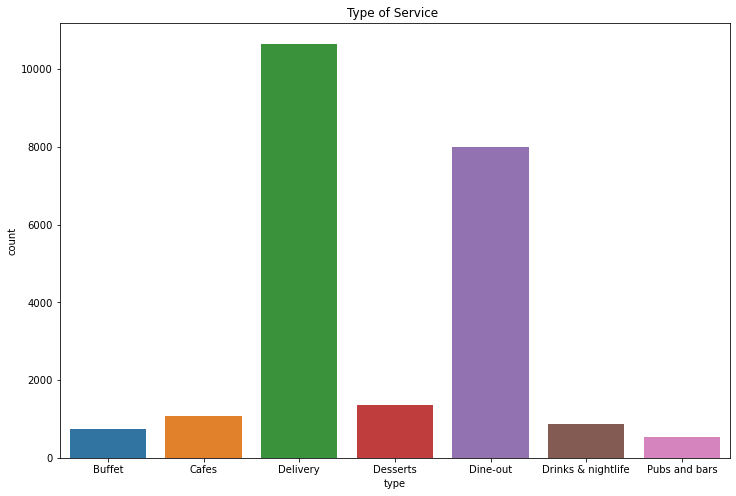

In [47]:
sns.countplot(df1['type'])
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Type of Service ')

* Most of the Restaurants offers Delivery and dine-out Services

In [48]:
import re

In [49]:
# arranging the index values
df1.index=range(df1.shape[0])

In [50]:
count=[]
for i in range(df1.shape[0]):
    dishes=re.split(',',df1['dish_liked'][i])
    for i in dishes:
        count.append(i)

In [51]:
count[:5]

['Pasta',
 ' Lunch Buffet',
 ' Masala Papad',
 ' Paneer Lajawab',
 ' Tomato Shorba']

In [52]:
# Top 30 Most Liked food
most_liked=pd.Series(count).value_counts()[:30]
most_liked

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

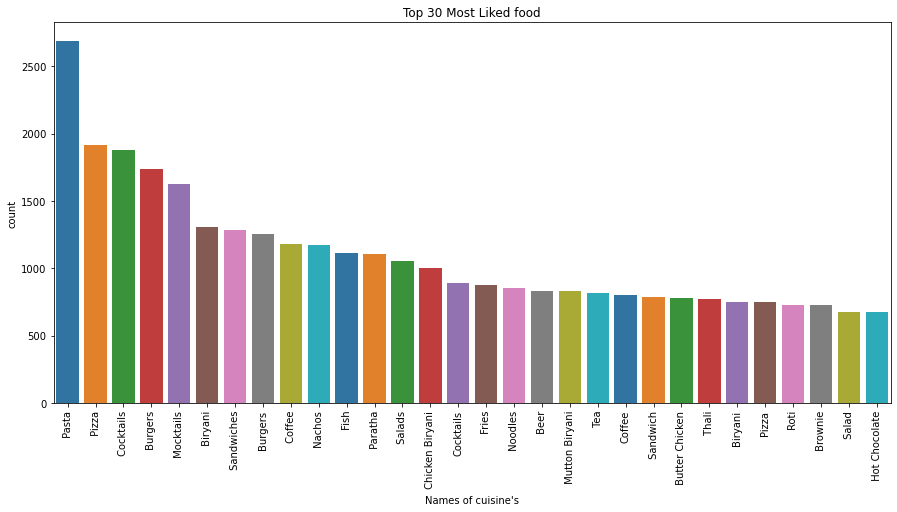

In [53]:
plt.figure(figsize=(15,7))
sns.barplot(x=most_liked.index,y=most_liked,palette='tab10')
plt.xticks(rotation=90)
plt.title("Top 30 Most Liked food")
plt.xlabel("Names of cuisine's")
plt.ylabel("count")
plt.show()

In [54]:
# top 5 most liked dishes 
pd.Series(most_liked[:5].index)

0         Pasta
1         Pizza
2     Cocktails
3       Burgers
4     Mocktails
dtype: object

# Restaurants Types

In [55]:
# Top most 30 Restaurants Types in Bangalore
df1.rest_type.value_counts()[:30]

Casual Dining                  7326
Quick Bites                    5250
Cafe                           2375
Dessert Parlor                 1083
Casual Dining, Bar              985
Delivery                        704
Bar                             358
Takeaway, Delivery              342
Bar, Casual Dining              336
Pub                             324
Fine Dining                     311
Casual Dining, Cafe             304
Lounge                          298
Pub, Casual Dining              224
Food Court                      220
Bakery                          166
Cafe, Casual Dining             159
Dessert Parlor, Cafe            143
Beverage Shop, Quick Bites      137
Beverage Shop                   137
Cafe, Bakery                    128
Casual Dining, Pub              124
Microbrewery, Casual Dining     121
Cafe, Dessert Parlor            111
Sweet Shop                      105
Bakery, Quick Bites              96
Sweet Shop, Quick Bites          88
Pub, Microbrewery           

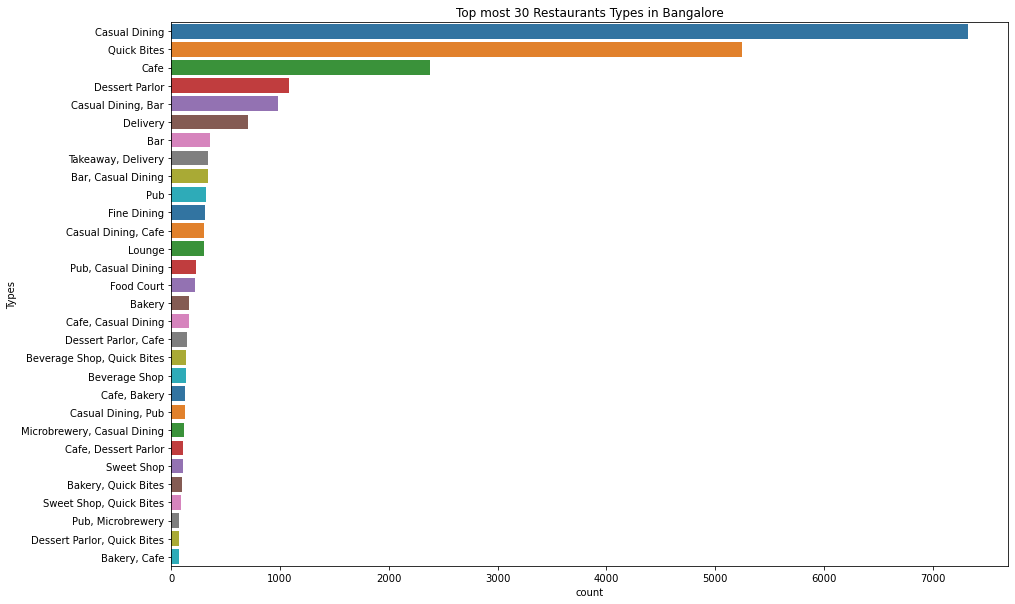

In [56]:
Types=df1.rest_type.value_counts()[:30]
plt.figure(figsize=(15,10))
sns.barplot(x=Types,y=Types.index,palette='tab10')
plt.title("Top most 30 Restaurants Types in Bangalore")
plt.xlabel("count")
plt.ylabel("Types")
plt.show()

In [57]:
# Top most 5 Restaurants Types in Bangalore
pd.Series(Types[:5].index)

0         Casual Dining
1           Quick Bites
2                  Cafe
3        Dessert Parlor
4    Casual Dining, Bar
dtype: object

# Top Restaurants 

In [58]:
# Top 15 Restaurants
df1.name.value_counts()[:15]

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Polar Bear                48
Smoor                     47
Mani's Dum Biryani        47
Pizza Stop                46
Mainland China            45
Name: name, dtype: int64

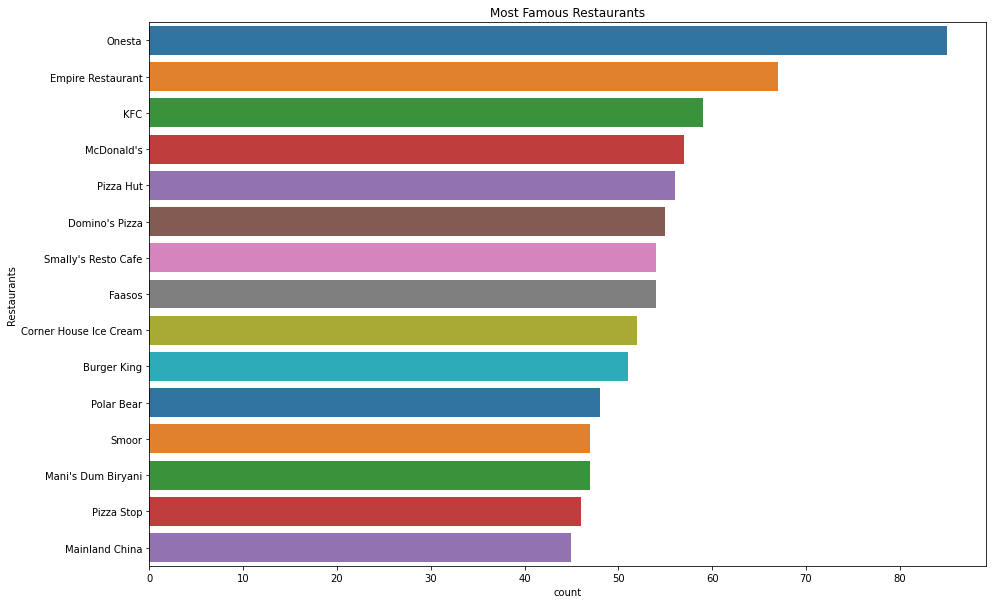

In [59]:
# Most Famous Restaurants
Top=df1.name.value_counts()[:15]
plt.figure(figsize=(15,10))
sns.barplot(x=Top,y=Top.index,palette='tab10')
plt.title("Most Famous Restaurants")
plt.xlabel("count")
plt.ylabel("Restaurants")
plt.show()

# Model Bulding

In [60]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [61]:
df1.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [62]:
df1.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [63]:
df1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [64]:
df1['online_order'] = df1['online_order'].replace(['Yes'],1)
df1['online_order'] = df1['online_order'].replace(['No'],0)

In [65]:
df1.head(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [66]:
df1.dtypes

address          object
name             object
online_order      int64
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [67]:
df1.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [68]:
df1['book_table'] = df1['book_table'].replace(['Yes'],1)
df1['book_table'] = df1['book_table'].replace(['No'],0)

In [69]:
# Number of unique values in each column
for column_name in df1:
      print(column_name,":",df1[column_name].nunique())

address : 4379
name : 3157
online_order : 2
book_table : 2
rate : 31
votes : 2303
location : 88
rest_type : 73
dish_liked : 5194
cuisines : 1681
cost : 57
reviews_list : 14075
menu_item : 5048
type : 7
city : 30


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
df1.location  = le.fit_transform(df1.location)
df1.rest_type = le.fit_transform(df1.rest_type)
df1.cuisines  = le.fit_transform(df1.cuisines)
df1.menu_item = le.fit_transform(df1.menu_item)

In [72]:
df1.dtypes

address          object
name             object
online_order      int64
book_table        int64
rate            float64
votes             int64
location          int32
rest_type         int32
dish_liked       object
cuisines          int32
cost            float64
reviews_list     object
menu_item         int32
type             object
city             object
dtype: object

In [73]:
New_data=df1.iloc[:,[2,3,4,5,6,7,9,10,12]]
New_data.to_csv('Zomato_Encoded.csv')

In [74]:
df1.iloc[:,[2,3,4,5,6,7,9,10,12]]

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...
23243,1,1,3.8,128,84,5,1318,1200.0,5047
23244,0,0,3.9,77,84,38,878,2000.0,5047
23245,0,0,2.8,161,84,21,539,1200.0,5047
23246,0,0,2.5,81,84,21,80,800.0,5047


In [75]:
# X and y values to train model

In [76]:
X=df1.iloc[:,[2,3,5,6,7,9,10,12]]
y=df1['rate']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

# Linear Regression Model

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.2296638602693858

# RandomForestRegressor model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=650)
gbrt.fit(x_train, y_train)

# calculate error on validation set
errors = [mean_squared_error(y_test, y_pred)
 for y_pred in gbrt.staged_predict(x_test)]

bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=10,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

RFR=RandomForestRegressor(n_estimators=645,random_state=245,min_samples_leaf=.0001)
RFR.fit(x_train,y_train)
y_predict=RFR.predict(x_test)

r2_score(y_test,y_predict)

# ExtraTree Regressor

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [ ]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

ET_Model=ExtraTreesRegressor(n_estimators = 645)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

* Extra Tree Regressor gives us the best model